In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

In [3]:
tre=np.array([425.340709,782.716105,1796.153258,7046.638657,14893.46375,
              np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan])
de=np.array([4.312751,4.33418,4.940749,7.563069,12.091565,198.131749,
            1385.162441,4518.892493,66056.648,np.nan,np.nan,np.nan])

spark = np.array([33.25,
                36.82,
                45.75,
                81.77,
                151.55,
                1603.59,
                5631.40,
                15029.87 ,  
                 153586.253,
                  np.nan,
                  np.nan,
                  np.nan])

scgco=np.array([0.7302708625793457,
                 1.160381555557251,
                 1.7411181926727295,
                 3.2735602855682373,
                 4.78583836555481,
                 15.837266683578491,
                 32.93152594566345,
                 68.35161447525024,
                 214.4603304862976,
                 438.1465427875519,
                 2432.1537821292877,
                 5271.786563158035])


In [5]:
## Time units is: minutes
time_df=pd.DataFrame({'trendsceek':tre/5,'SpatialDE':de/60,'scGCO':scgco/60, 'spark':spark/60},
                 index=[100,250,500,1000,1500,5000,10000,15000,50000,100000,500000,1000000] )
time_df

,trendsceek,SpatialDE,scGCO,spark
100,85.068142,0.071879,0.012171,0.554167
250,156.543221,0.072236,0.019340,0.613667
500,359.230652,0.082346,0.029019,0.762500
1000,1409.327731,0.126051,0.054559,1.362833
1500,2978.692750,0.201526,0.079764,2.525833
5000,NaN,3.302196,0.263954,26.726500
10000,NaN,23.086041,0.548859,93.856667
15000,NaN,75.314875,1.139194,250.497833
50000,NaN,1100.944133,3.574339,2559.770883
100000,NaN,NaN,7.302442,NaN


In [14]:
## Time when run 1M cells with scGCO 
print('Time when run 1M cells with scGCO is {:.1f} hours: '.format(time_df.scGCO.values[-1]/60))

Time when run 1M cells with scGCO is 1.5 hours: 


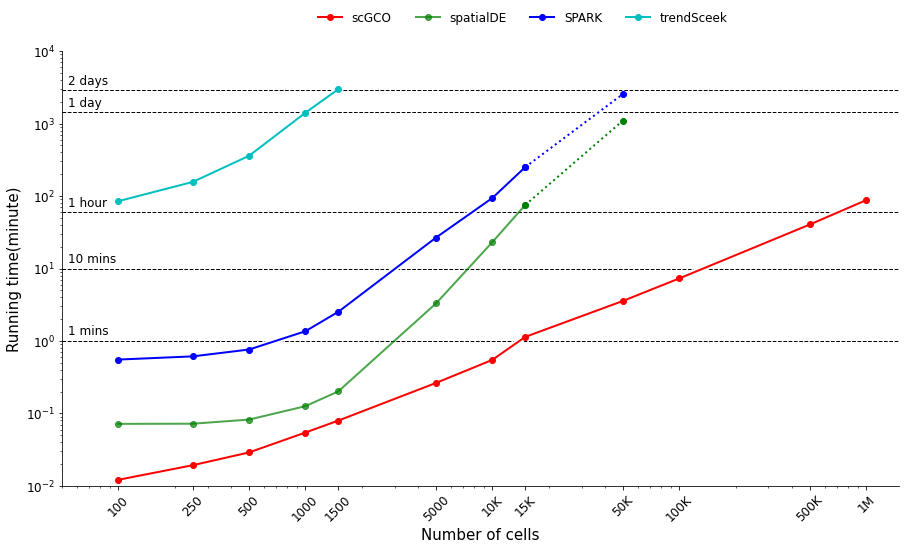

In [15]:
## 100 genes
time=time_df

plt.figure(figsize=(15,8))
plt.yscale("log")
plt.xscale("log")

colors={'trendsceek':'tab',"scGCO":'tab',"spark":'tab'}
for method in colors:
    plt.plot(time.index.values,time.loc[:,method],lw=6,color="w",label='')


plt.plot(time.index.values,time.scGCO.values,'r-',marker='.',label='scGCO',lw=2,ms=12)

plt.plot(time.iloc[0:8,1].index.values,time.iloc[0:8,1].values,'g-',marker='.',label='spatialDE',
        lw=2,ms=12,alpha=0.7)
plt.plot(time.iloc[7:10,1].index.values,time.iloc[7:10,1].values,'g:',marker='.',
        lw=2,ms=12)

# plt.plot(time.index.values,time.SPARK.values,'b-',marker='.',label='SPARK',lw=2,ms=12)
plt.plot(time.iloc[0:8,3].index.values,time.iloc[0:8,3].values,'b-',marker='.',label='SPARK',lw=2,ms=12)
plt.plot(time.iloc[7:10,3].index.values,time.iloc[7:10,3].values,'b:',marker='.',lw=2,ms=12)

plt.plot(time.index.values,time.trendsceek.values,'c-',marker='.',label='trendSceek',lw=2,ms=12)





#plt.title("Running time(100 genes)",size=18)

#plt.legend(numpoints=2, bbox_to_anchor=(1, 0), frameon=False)
plt.legend(numpoints=2, frameon=False)

plt.xlabel("Number of cells",size=15)
plt.ylabel("Running time(minute)",size=15)


plt.axhline(1, lw=1, c='k', zorder=0, ls='--')
plt.annotate('1 mins', (54, 1*1.1), va='bottom',fontsize=12)

plt.axhline(10, lw=1, c='k', zorder=0, ls='--')
plt.annotate('10 mins', (54, 10*1.1), va='bottom',fontsize=12)

plt.axhline(60, lw=1, c='k', zorder=0, ls='--');
plt.annotate('1 hour', (54, 60 * 1.1), va='bottom',fontsize=12)

plt.axhline(60 * 24, lw=1, c='k', zorder=0, ls='--');
plt.annotate('1 day', (54, 24 * 60 * 1.1), va='bottom',fontsize=12)

plt.axhline(60 * 24 * 2, lw=1, c='k', zorder=0, ls='--');
plt.annotate('2 days', (54, 2 * 24 * 60 * 1.1), va='bottom',fontsize=12)

#plt.axhline(60 * 24 * 14, lw=1, c='k', zorder=0, ls='--');
#plt.annotate('2 week', (54, 14 * 24 * 60 * 1.1), va='bottom')


plt.xlim([50,1500000])
plt.ylim([10E-3,10E3])
xtick=[100,250,500,1000,1500,5000,10000,15000,50000,100000,500000,1000000]
xlabel=['100','250','500','1000','1500','5000','10K','15K','50K','100K','500K','1M']
plt.xticks(xtick,xlabel,rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.legend(ncol=4,loc=(0.3,1.05),fontsize=12,frameon=False)
plt.savefig('../../results/Figure//Fig2h.pdf')
plt.show()